In [1]:
# 16 OCT 
#import pandas for manpulation 
import pandas as pd
#import seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\maram\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#The dataset comes with a file called `Data_description.pdf`. 

In [3]:
#Load dataset
lb=pd.read_csv("C:/Users/maram/OneDrive/Desktop/My Project that i want to develop/Data analyst/3_Data/10-11_London_Bridge.txt")

In [4]:
lb

,Date and time,water level (m ODN),flag,HW=1 or LW=0
0,01/05/1911 15:40:00,3.7130,1,NaN
1,02/05/1911 11:25:00,-2.9415,0,NaN
2,02/05/1911 16:05:00,3.3828,1,NaN
3,03/05/1911 11:50:00,-2.6367,0,NaN
4,03/05/1911 16:55:00,2.9256,1,NaN
...,...,...,...,...
115498,30/12/1995 20:44:00,3.2900,1,NaN
115499,31/12/1995 02:32:00,-1.6000,0,NaN
115500,31/12/1995 08:59:00,3.2000,1,NaN
115501,31/12/1995 15:03:00,-1.8000,0,NaN


In [5]:
lb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115503 entries, 0 to 115502
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date and time         115503 non-null  object 
 1    water level (m ODN)  115503 non-null  object 
 2    flag                 115503 non-null  int64  
 3    HW=1 or LW=0         0 non-null       float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ MB


In [6]:
df=lb[lb.columns[0:3]]

In [7]:
#rename the columns
df.columns = ['datetime','water_level','is_high_tide']

In [8]:
df

,datetime,water_level,is_high_tide
0,01/05/1911 15:40:00,3.7130,1
1,02/05/1911 11:25:00,-2.9415,0
2,02/05/1911 16:05:00,3.3828,1
3,03/05/1911 11:50:00,-2.6367,0
4,03/05/1911 16:55:00,2.9256,1
...,...,...,...
115498,30/12/1995 20:44:00,3.2900,1
115499,31/12/1995 02:32:00,-1.6000,0
115500,31/12/1995 08:59:00,3.2000,1
115501,31/12/1995 15:03:00,-1.8000,0


In [9]:
# we have to convert the datetime column into datetime type so, we can do our colculation
df['datetime']=pd.to_datetime(df['datetime'])

<ipython-input-9-7d17ad032a38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime']=pd.to_datetime(df['datetime'])


In [10]:
df['datetime'].head(4)

0   1911-01-05 15:40:00
1   1911-02-05 11:25:00
2   1911-02-05 16:05:00
3   1911-03-05 11:50:00
Name: datetime, dtype: datetime64[ns]

In [11]:
# then we have to convert the water_level column into float, using astype function
df['water_level']=df['water_level'].astype(float)

<ipython-input-11-230399e41afb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['water_level']=df['water_level'].astype(float)


In [12]:
df['water_level'].head(4)

0    3.7130
1   -2.9415
2    3.3828
3   -2.6367
Name: water_level, dtype: float64

In [13]:
#add to columns year and month 
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df

,datetime,water_level,is_high_tide,year,month
0,1911-01-05 15:40:00,3.7130,1,1911,1
1,1911-02-05 11:25:00,-2.9415,0,1911,2
2,1911-02-05 16:05:00,3.3828,1,1911,2
3,1911-03-05 11:50:00,-2.6367,0,1911,3
4,1911-03-05 16:55:00,2.9256,1,1911,3
...,...,...,...,...,...
115498,1995-12-30 20:44:00,3.2900,1,1995,12
115499,1995-12-31 02:32:00,-1.6000,0,1995,12
115500,1995-12-31 08:59:00,3.2000,1,1995,12
115501,1995-12-31 15:03:00,-1.8000,0,1995,12


In [14]:
#now, lets creat a function that do all the cleaning steps 
def cleaing (data) :  
    data=pd.read_csv(data)
    data=data[data.columns[0:3]]
    data.columns = ['datetime','water_level','is_high_tide']
    data['datetime']=pd.to_datetime(data['datetime'])
    data['water_level']=data['water_level'].astype(float)
    data['year']=data['datetime'].dt.year
    data['month']=data['datetime'].dt.month
    return data

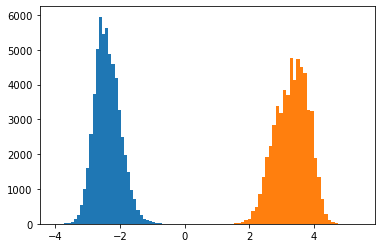

In [22]:
#hist
plt.hist(df.query('is_high_tide==0')['water_level'],bins=50)
plt.hist(df.query('is_high_tide==1')['water_level'],bins=50)
plt.show()

In [17]:
print(pd.__version__)

1.5.0


<AxesSubplot:xlabel='water_level'>

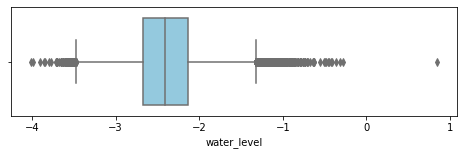

In [26]:
#boxbolt
plt.figure(figsize=(8,2))
sns.boxplot(data=df.query('is_high_tide==0'),x='water_level',color='skyblue')
#most of the values are range  between -2 to -3 when the tide = 0

<AxesSubplot:xlabel='water_level'>

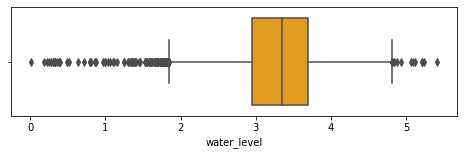

In [29]:
plt.figure(figsize=(8,2))
sns.boxplot(data=df.query('is_high_tide==1'),x='water_level',color='orange')
#most of the values are range  between 3 to 3.7 when the tide = 1

In [33]:
df.query('is_high_tide==0').describe()

,water_level,is_high_tide,year,month
count,57580.000000,57586.0,57586.000000,57586.000000
mean,-2.383737,0.0,1953.671708,6.532491
std,0.399748,0.0,24.366551,3.444258
min,-4.013000,0.0,1911.000000,1.000000
25%,-2.666900,0.0,1933.000000,4.000000
50%,-2.412900,0.0,1954.000000,7.000000
75%,-2.128700,0.0,1975.000000,10.000000
max,0.842900,0.0,1995.000000,12.000000


In [34]:
df.query('is_high_tide==1').describe()

,water_level,is_high_tide,year,month
count,57909.000000,57917.0,57917.000000,57917.000000
mean,3.318373,1.0,1953.701400,6.534126
std,0.509422,0.0,24.334694,3.441167
min,0.010000,1.0,1911.000000,1.000000
25%,2.956400,1.0,1933.000000,4.000000
50%,3.352600,1.0,1954.000000,7.000000
75%,3.700000,1.0,1975.000000,10.000000
max,5.409900,1.0,1995.000000,12.000000


In [52]:
plt.figsize=(8,3)
all_days=df.query('is_high_tide==1').groupby('year').count()['is_high_tide']

In [53]:
all_days

year
1911    244
1912    557
1913    669
1914    688
1915    666
       ... 
1991    706
1992    707
1993    699
1994    705
1995    705
Name: is_high_tide, Length: 85, dtype: int64

In [54]:
high_days=df.query(f'(is_high_tide==1)&(water_level>3.7)').groupby('year').count()['is_high_tide']

In [55]:
high_days

year
1911      8
1912     71
1913    125
1914    111
1915    146
       ... 
1991    178
1992    188
1993    222
1994    252
1995    229
Name: is_high_tide, Length: 85, dtype: int64

In [56]:
#colculate the ratio 
ratio=(high_days/all_days)

In [57]:
ratio=ratio.reset_index()

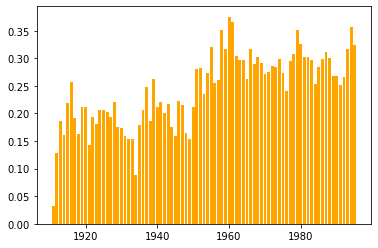

In [58]:
plt.bar(ratio.year,ratio.is_high_tide,color='orange')
plt.show()

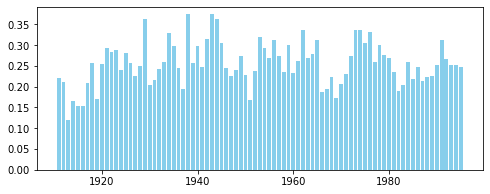

In [60]:
#The same thing for low tide
plt.figure(figsize=(8,3))
all_days = df.query('is_high_tide==0').groupby('year').count()['water_level']
high_days = df.query('(water_level<-2.66) & (is_high_tide==0)').groupby('year').count()['water_level']
ratio = (high_days/all_days).reset_index()
plt.bar(ratio.year,ratio.water_level,color='skyblue')
plt.show()

In [67]:
water_level = pd.DataFrame()

for year in [1927, 1928, 1929]:
    level_per_year = df.query(f'year=={year}').set_index('datetime')
    level_per_year = level_per_year.groupby('is_high_tide').resample('1M').median()['water_level'].reset_index()
    level_per_year['month'] = level_per_year.datetime.dt.month
    level_per_year['year'] = level_per_year.datetime.dt.year    
    water_level = pd.concat([water_level, level_per_year]).reset_index(drop=True)

In [66]:
water_level[water_level['is_high_tide']==0].describe()

,is_high_tide,datetime,water_level,month,year
0,0,1927-01-31,-2.3700,1,1927
1,0,1927-02-28,-2.3827,2,1927
2,0,1927-03-31,-2.4081,3,1927
3,0,1927-04-30,-2.4589,4,1927
4,0,1927-05-31,-2.5351,5,1927


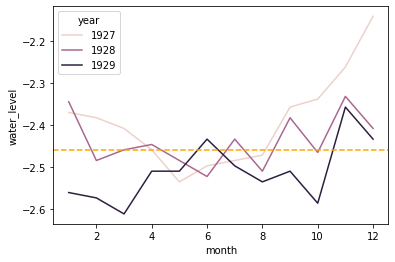

In [65]:
sns.lineplot(data=water_level[water_level['is_high_tide']==0],y='water_level',x='month',hue='year')
plt.axhline(-2.46,0,12,linestyle='--',color='orange')
plt.show()

In [68]:
water_level[water_level['is_high_tide']==1].describe()

,is_high_tide,water_level,month,year
count,36.0,36.000000,36.00000,36.000000
mean,1.0,3.266560,6.50000,1928.000000
std,0.0,0.104571,3.50102,0.828079
min,1.0,3.039900,1.00000,1927.000000
25%,1.0,3.209763,3.75000,1927.000000
50%,1.0,3.249450,6.50000,1928.000000
75%,1.0,3.324063,9.25000,1929.000000
max,1.0,3.459000,12.00000,1929.000000


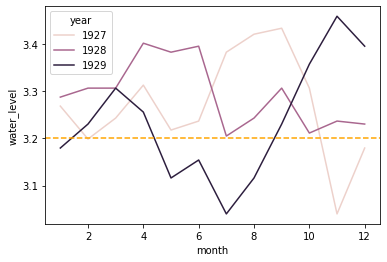

In [70]:
sns.lineplot(data=water_level[water_level['is_high_tide']==1],y='water_level',x='month',hue='year')
plt.axhline(3.2,0,12,linestyle='--',color='orange')
plt.show()